# Assignment

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Analytics for Numerical Columns

In [99]:
df = pd.read_csv('sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [100]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [101]:
# Calculate basic statistical measures
stats = df[numerical_cols].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std']).transpose()
stats.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation']

In [102]:
# Provide interpretation
print("Basic Statistical Measures for Numerical Columns:")
print(stats)

Basic Statistical Measures for Numerical Columns:
                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


## Data Visualization

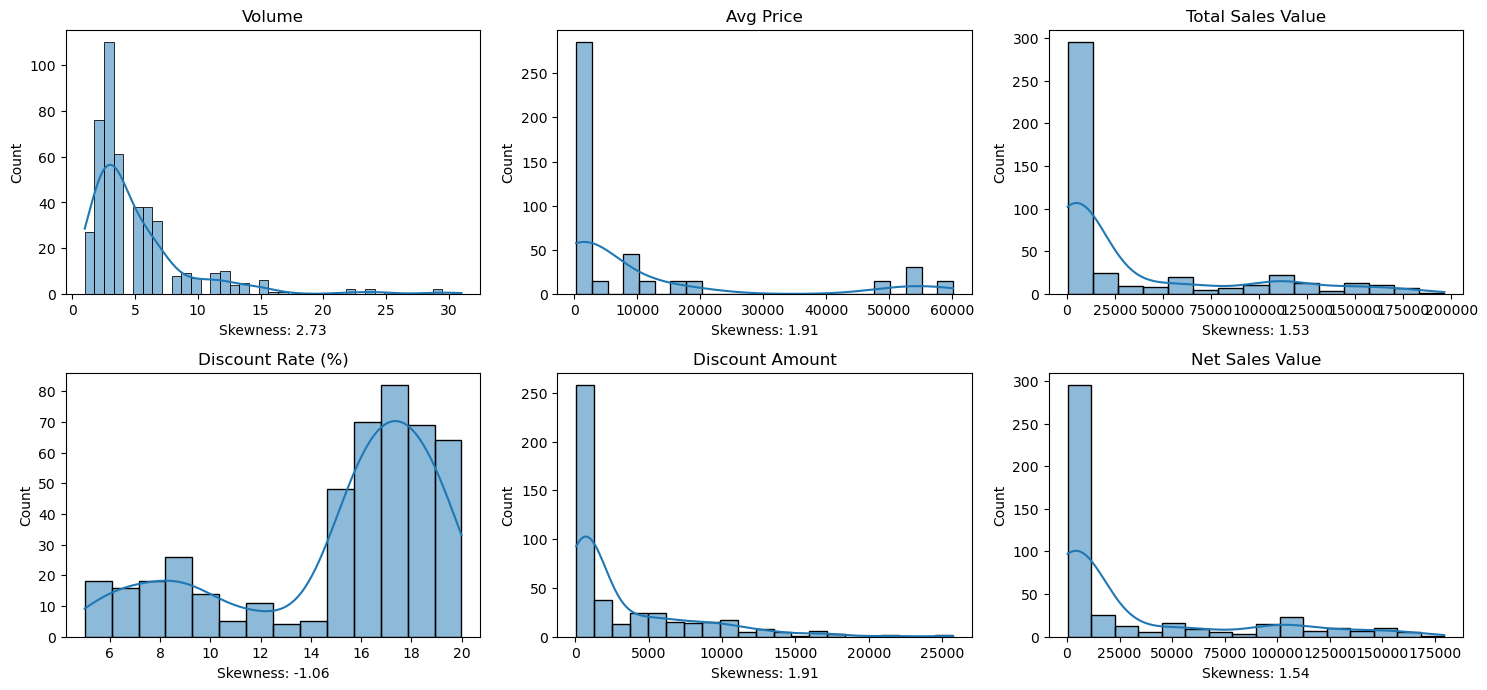

Column: Volume
Number of outliers: 44
Outlier values: [15 13 11 29 13 24 14 12 25 15 11 15 14 12 12 12 22 11 11 12 12 14 11 11
 15 31 12 16 24 11 12 12 22 11 13 15 12 14 14 11 29 15 13 17]
Lower bound: -1.5, Upper bound: 10.5

Column: Avg Price
Number of outliers: 60
Outlier values: [49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100]
Lower bound: -13987.5, Upper bound: 24552.5

Column: Total Sales Value
Number of outliers: 36
Outlier values: [181500 147300 180300 133100 147300 165300 180300 196400 147300 147300
 162300 162300 145200 147300 162300 165300 180300 169400 147300 181500
 140700 147300 165300 145200 147300 165300 180300 165300 180300 140700
 147300 133100 147300 15730

In [106]:
# Calculate skewness for each numerical column
skewness = df[numerical_cols].skew()

# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(f"Skewness: {skewness[col]:.2f}")
plt.tight_layout()
plt.show()

# Identify outliers using IQR method and provide inferences
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values: {outliers[col].values}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print("")

# Provide inferences
print("Inferences:")
print("1. Skewness:")
for col, val in skewness.items():
    if abs(val) > 1:
        print(f"   - Column '{col}' is highly skewed ({val:.2f}).")
    elif abs(val) > 0.5:
        print(f"   - Column '{col}' is moderately skewed ({val:.2f}).")
    else:
        print(f"   - Column '{col}' is approximately symmetric ({val:.2f}).")

print("\n2. Outliers:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    if num_outliers > 0:
        print(f"   - Column '{col}' has {num_outliers} outliers.")



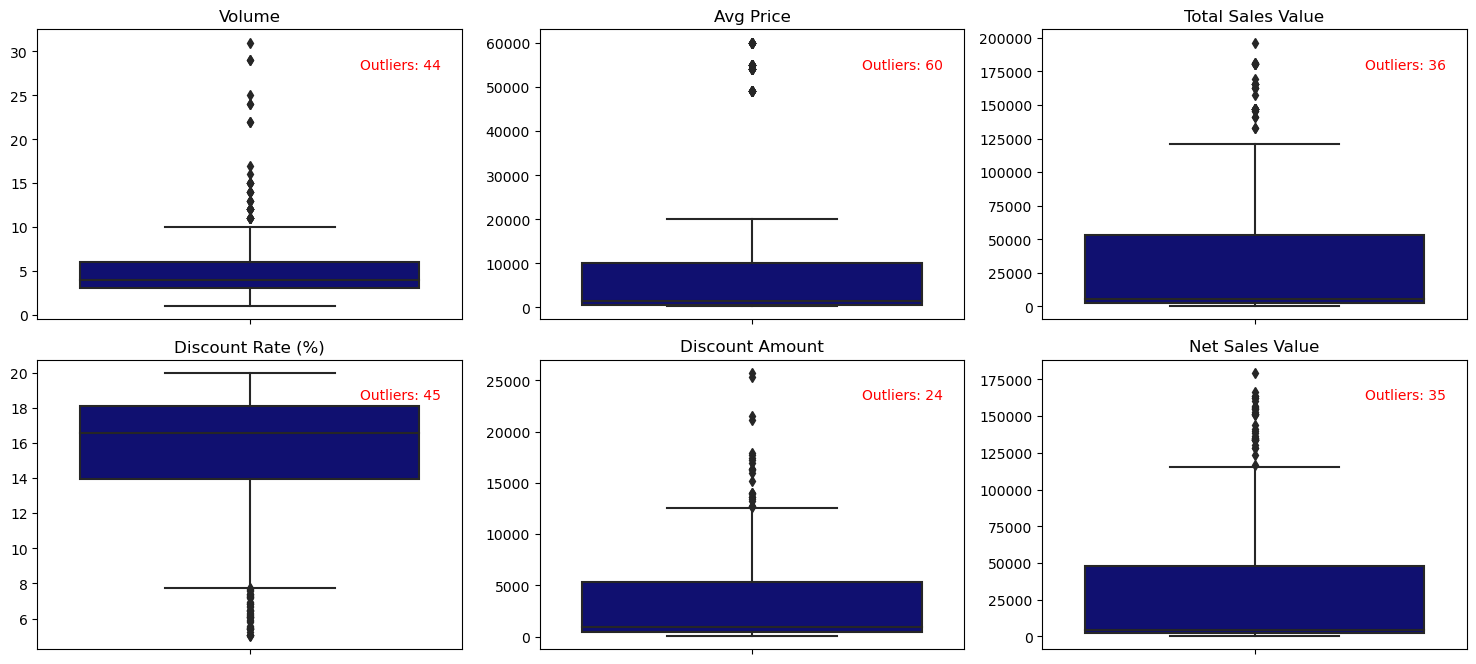

In [112]:
# Plot boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='navy')
    plt.title(col)
    plt.ylabel("")
    
    # Calculate outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    plt.text(0.95, 0.9, f"Outliers: {len(outliers)}", transform=plt.gca().transAxes, ha='right', va='top', color='red')
plt.tight_layout()
plt.show()

In [105]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

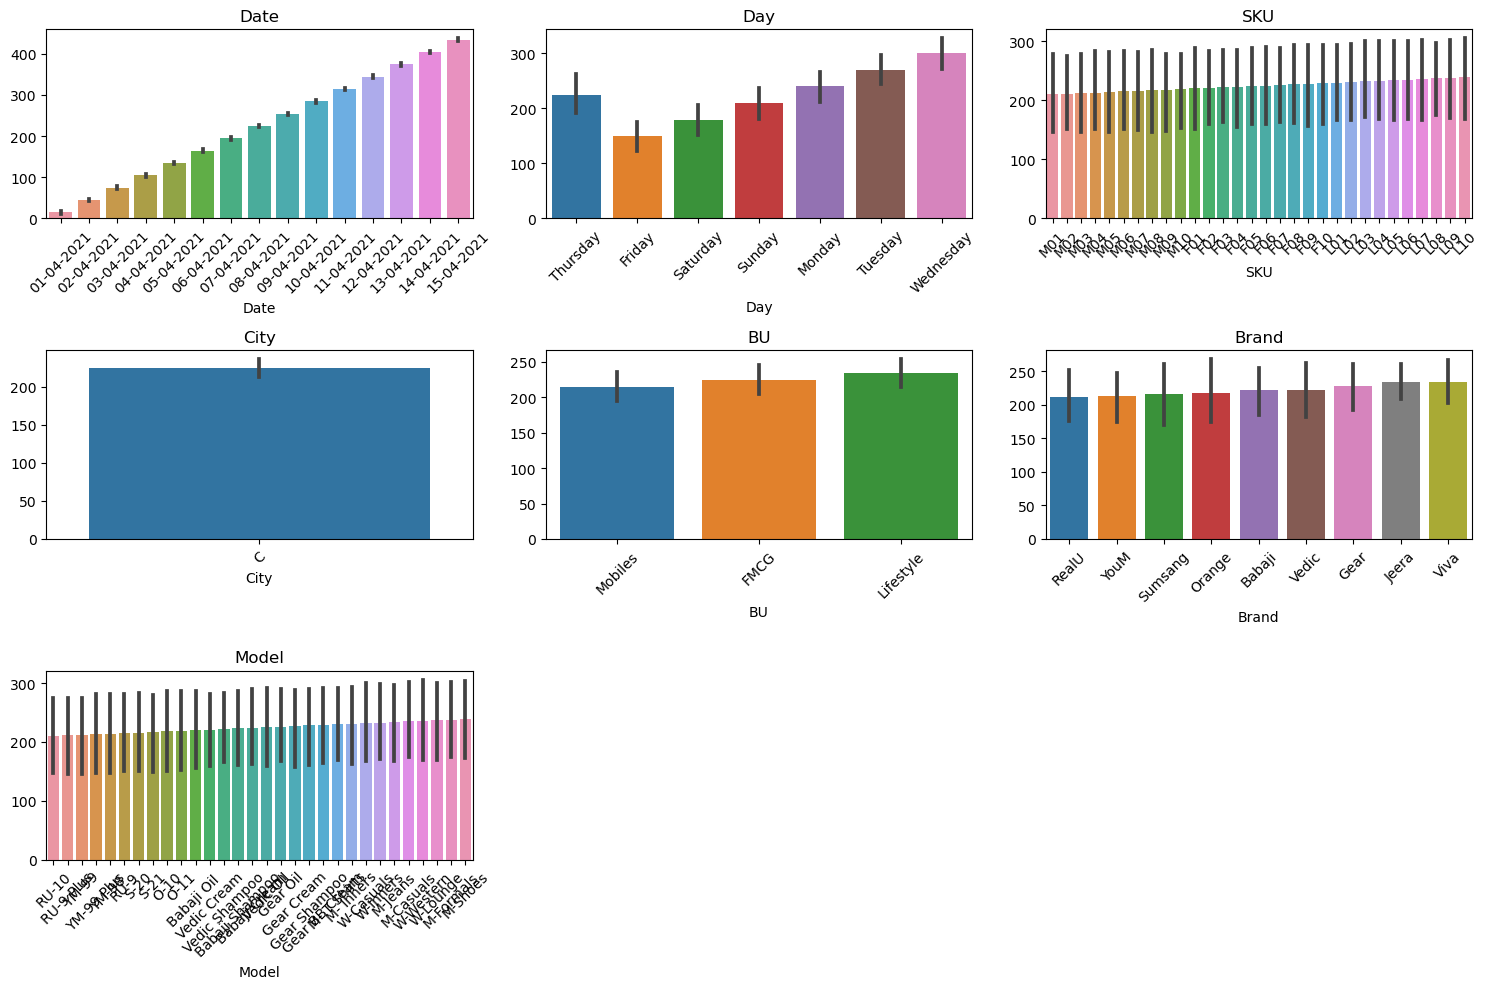

In [97]:
# Plot bar charts for each categorical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(data=df, x=col, y=df.index)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Standardization of Numerical Variables

In [81]:
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [116]:
# To know the mean and standard deviation of each column
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [121]:
df[numerical_cols].agg(['std'])

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [123]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Standardize numerical columns
df_standardized = df.copy()
for col in numerical_cols:
    mu = df[col].mean()  # Calculate mean for the column
    sigma = df[col].std()  # Calculate standard deviation for the column
    df_standardized[col] = (df[col] - mu) / sigma  # Standardize the column

# Display the standardized DataFrame
df_standardized

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.724706,Lifestyle,Jeera,M-Casuals,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,15-04-2021,Thursday,L07,C,0.220563,Lifestyle,Viva,W-Western,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,15-04-2021,Thursday,L08,C,-0.724706,Lifestyle,Viva,W-Lounge,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,15-04-2021,Thursday,L09,C,-0.488389,Lifestyle,Jeera,M-Formals,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


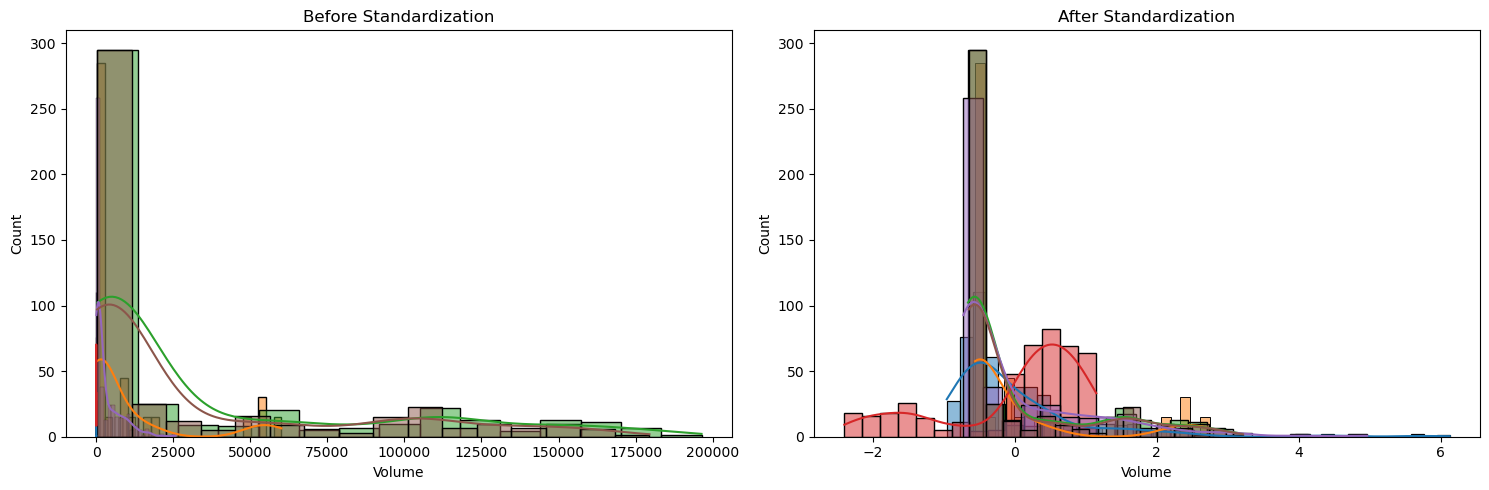

In [124]:
# Plot histograms for each numerical column before and after standardization
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title('Before Standardization')

    plt.subplot(1, 2, 2)
    sns.histplot(df_standardized[col], kde=True)
    plt.title('After Standardization')

plt.tight_layout()
plt.show()

## Conversion of Categorical Data into Dummy Variables

In [128]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype='int')

# Display a portion of the transformed dataset
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Conclusion